# Seaborn

Es un paquete para visualizaciones estadísticas con muchísimas capacidades

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('fandango_score_comparison.csv')
df.head().T

,0,1,2,3,4
FILM,Avengers: Age of Ultron (2015),Cinderella (2015),Ant-Man (2015),Do You Believe? (2015),Hot Tub Time Machine 2 (2015)
RottenTomatoes,74,85,80,18,14
RottenTomatoes_User,86,80,90,84,28
Metacritic,66,67,64,22,29
Metacritic_User,7.1,7.5,8.1,4.7,3.4
IMDB,7.8,7.1,7.8,5.4,5.1
Fandango_Stars,5.0,5.0,5.0,5.0,3.5
Fandango_Ratingvalue,4.5,4.5,4.5,4.5,3.0
RT_norm,3.7,4.25,4.0,0.9,0.7
RT_user_norm,4.3,4.0,4.5,4.2,1.4


c:\users\joaquin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RT_norm', ylabel='Density'>

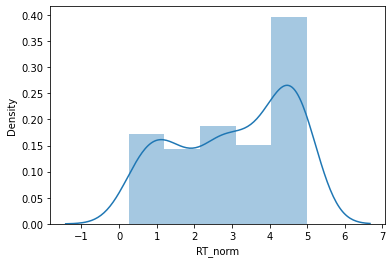

In [3]:
sns.distplot(df['RT_norm'])

Adicional al histograma que dibuja Pandas, también añade una curva que es **kernel density estimator** sirve para aproximar la curva de distribución cuando solo hay pocos puntos, esta curva se puede obtener en una dimensión

<AxesSubplot:xlabel='RT_norm', ylabel='Density'>

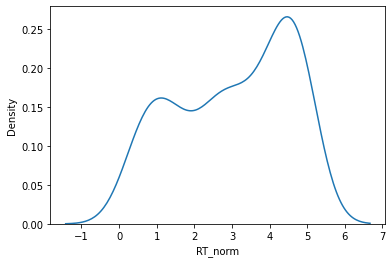

In [3]:
sns.kdeplot(df['RT_norm'])

...o en más de una dimensión, por ejemplo en el caso donde hacíamos un scatter que mostraba la calificación de los críticos contra la calificación de los usuarios. Un mapa de densidad nos puede ayudar a corroborar la tendencia que vemos (una relación lineal), así como para determinar donde se encuentra la mayor distribución de puntos

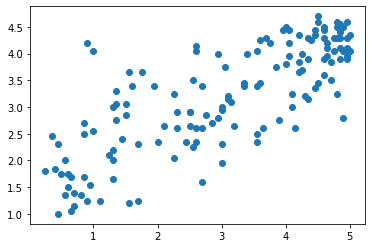

In [5]:
plt.scatter(x=df.RT_norm, y=df.RT_user_norm)

c:\users\joaquin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RT_norm', ylabel='RT_user_norm'>

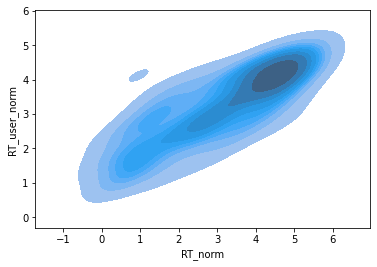

In [4]:
sns.kdeplot(df.RT_norm,df.RT_user_norm, shade=True)

c:\users\joaquin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Calificación Usuarios')

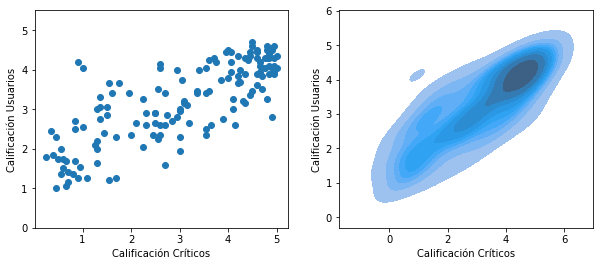

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(x=df.RT_norm, y=df.RT_user_norm)
plt.xlabel('Calificación Críticos')
plt.ylabel('Calificación Usuarios')
plt.ylim(0, 5.5)

plt.subplot(122)
sns.kdeplot(df.RT_norm,df.RT_user_norm, shade=True)
plt.xlabel('Calificación Críticos')
plt.ylabel('Calificación Usuarios')

## jointplot

La gráfica de jointplot provee de mayor información estadística, incluyendo los histogramas por cada una de las variables

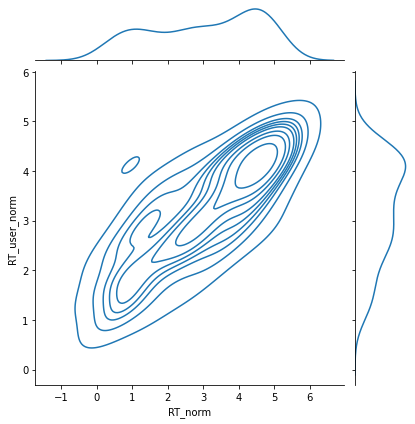

In [5]:
sns.jointplot(x='RT_norm', y='RT_user_norm', data=df, kind='kde')

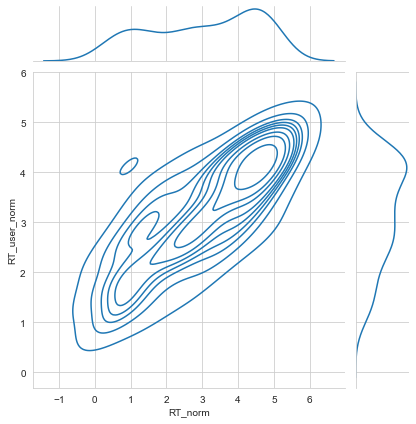

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x='RT_norm', y='RT_user_norm', data=df, kind='kde', shade=False)

`sns.set_context()` permite escalar toda la tipografía de acuerdo al "contexto" en el que se va a presentar la infografía:

* paper
* notebook
* talk
* poster

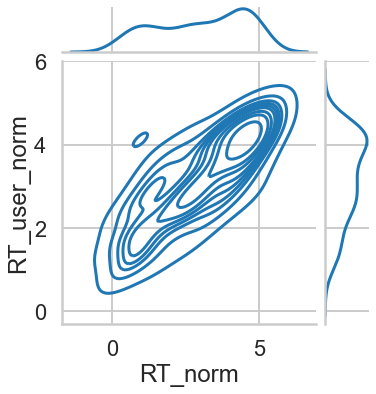

In [7]:
sns.set_style('whitegrid')
sns.set_context('poster')
sns.jointplot(x='RT_norm', y='RT_user_norm', data=df, kind='kde', shade=False)

## Mapa de calor

Utilizaremos el dataset de bebidas, para hacer un mapa de calor, y ver en qué países se toma qué tipo de bebidas

In [10]:
sns.set_style('darkgrid')
sns.set_context('paper')

In [11]:
drinks = pd.read_csv('drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


* Para que el mapa de calor funcione, se requiere un índice, ya que utiliza el resto de las columnas como datos para su cálculo
* Eliminamos el número de litros de alcohol, para usar unidades similares (bebidas)

In [12]:
heat = drinks.drop('total_litres_of_pure_alcohol', axis=1).set_index('country')
heat.head()

,beer_servings,spirit_servings,wine_servings
country,,,
Afghanistan,0,0,0
Albania,89,132,54
Algeria,25,0,14
Andorra,245,138,312
Angola,217,57,45


<AxesSubplot:ylabel='country'>

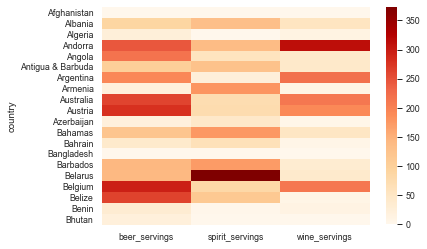

In [14]:
sns.heatmap(heat[:20], cmap='OrRd')

## Regresiones

Muestran la relación entre dos variables y ela incertidumbre, que varía dependiendo de la densidad de los puntos

<AxesSubplot:xlabel='beer_servings', ylabel='wine_servings'>

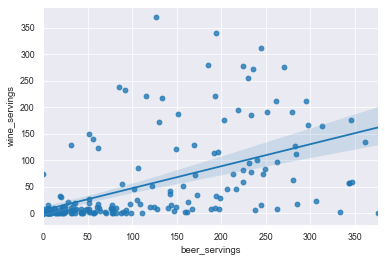

In [15]:
sns.regplot(x='beer_servings', y="wine_servings", data=drinks)

<AxesSubplot:xlabel='RT_norm', ylabel='RT_user_norm'>

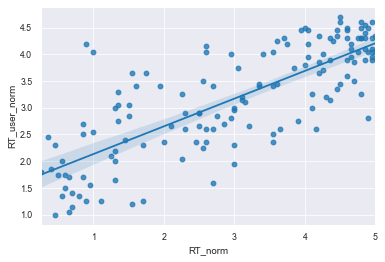

In [16]:
sns.regplot(x='RT_norm', y='RT_user_norm', data=df)

También puede calcular una regresión de otro orden de magnitud, por ejemplo, una cuadrática:

<AxesSubplot:xlabel='beer_servings', ylabel='wine_servings'>

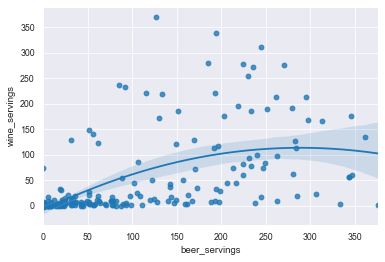

In [17]:
sns.regplot(x='beer_servings', y="wine_servings", data=drinks, order=2)

## pairplot

Nos permite comparar muchos datos de un solo vistazo

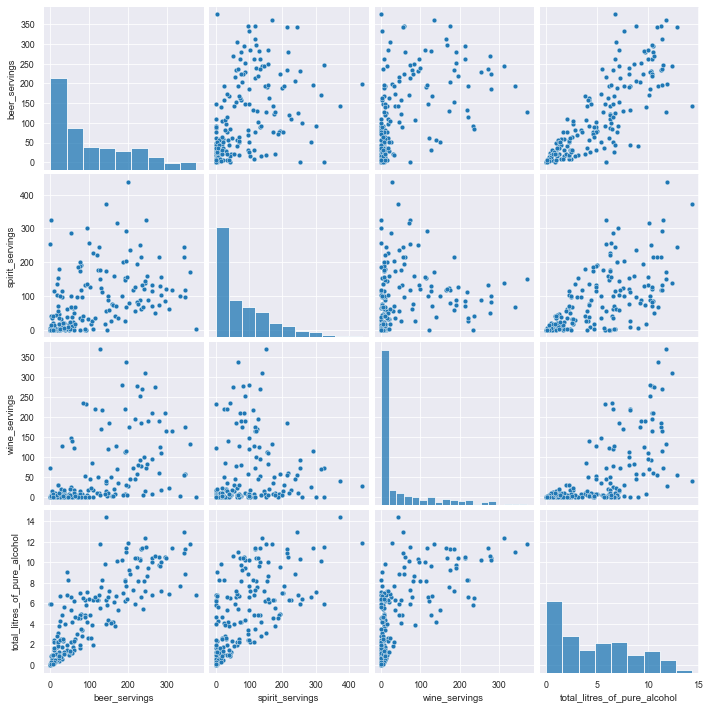

In [18]:
sns.pairplot(drinks)

Por ejemplo, en la gráfica anterior, podemos ver cómo el consumo de cerveza es el que se ve que se relaciona más con el consumo total de alcohol en un país, mientras que los licores y el vino tienen una mayor dispersión.

También se puede ver como no hay gran relación entre el consumo de un tipo de alcohol y los otros

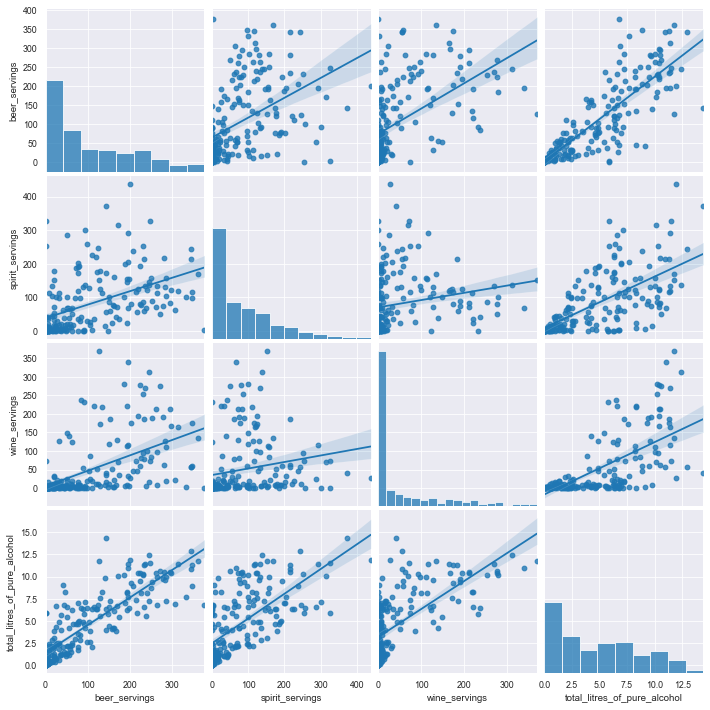

In [19]:
sns.pairplot(drinks, kind='reg')